Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models # dataset untuk melatih dan menguji model. layers lapisan yang dapat digunakan dalam arsitektur jaringan saraf. models untuk membangun model secara berurutan dengan lapisan-lapisan yang ditambahkan satu per satu.
import matplotlib.pyplot as plt # untuk visualisasi grafik.
from tensorflow.keras import regularizers # jenis regularisasi yang digunakan untuk mengurangi overfitting pada model.
from tensorflow.keras.optimizers import Adam # algoritma optimisasi yang digunakan untuk melatih model.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


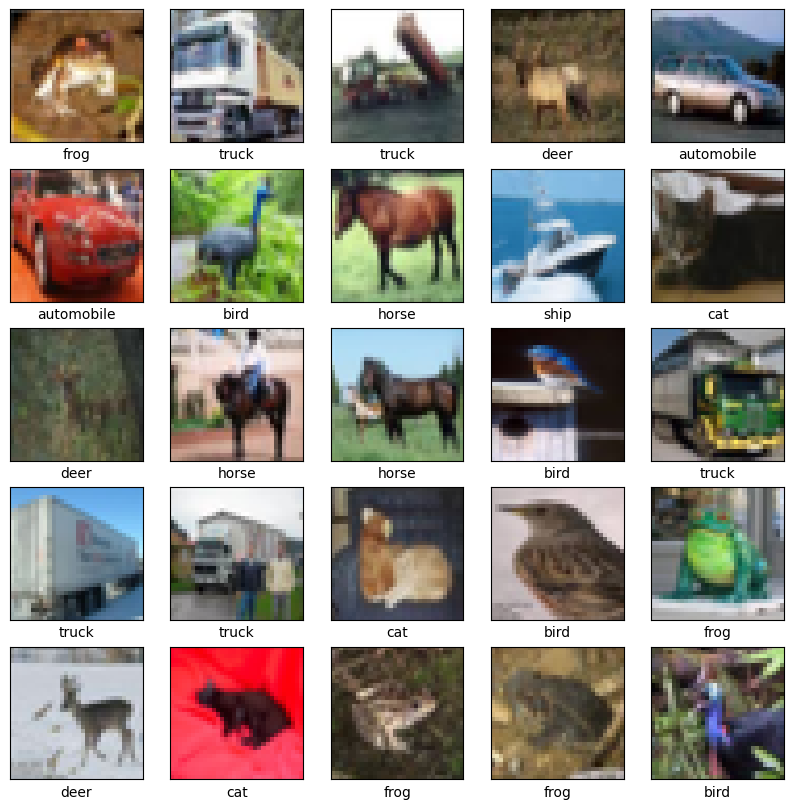

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
       'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
# Model definition
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - 29s 9ms/step - loss: 3.0543 - accuracy: 0.2858 - val_loss: 2.4119 - val_accuracy: 0.4231
Epoch 2/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.5683 - accuracy: 0.3872 - val_loss: 2.2234 - val_accuracy: 0.4895
Epoch 3/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3482 - accuracy: 0.4409 - val_loss: 2.0950 - val_accuracy: 0.5181
Epoch 4/100
1563/1563 [==============================] - 13s 9ms/step - loss: 2.1747 - accuracy: 0.4811 - val_loss: 2.0005 - val_accuracy: 0.5348
Epoch 5/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.0323 - accuracy: 0.5123 - val_loss: 1.9893 - val_accuracy: 0.5252
Epoch 6/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9058 - accuracy: 0.5406 - val_loss: 1.7604 - val_accuracy: 0.5827
Epoch 7/100
1563/1563 [==============================] - 13s 9ms/step - loss: 1.7937 - accuracy: 0.5621 - val_loss: 1.5728 -

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        2

313/313 - 1s - loss: 0.6767 - accuracy: 0.8133 - 828ms/epoch - 3ms/step


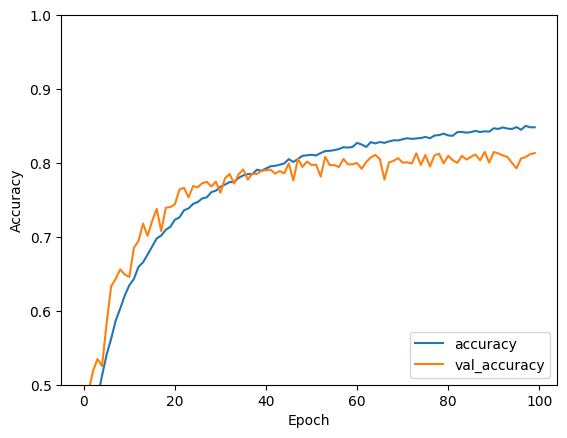

In [9]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [10]:
print("Akurasi: {:.2%}".format(test_acc))

Akurasi: 81.33%
